In [5]:
from neuralforecast.utils import AirPassengersDF

Y_df = AirPassengersDF # Defined in neuralforecast.utils
Y_df.head(10)



,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
5,1.0,1949-06-30,135.0
6,1.0,1949-07-31,148.0
7,1.0,1949-08-31,148.0
8,1.0,1949-09-30,136.0
9,1.0,1949-10-31,119.0


In [14]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN


horizon = 100

# Try different hyperparmeters to improve accuracy.
models = [LSTM(h=horizon,                    # Forecast horizon
               max_steps=500,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=64,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=64,),     # Defines the number of hidden units of each layer of the MLP decoder
          NHITS(h=horizon,                   # Forecast horizon
                input_size=2 * horizon,      # Length of input sequence
                max_steps=100,               # Number of steps to train
                n_freq_downsample=[2, 1, 1]) # Downsampling factors for each stack output
          ]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_df)


Seed set to 1
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 50.4 K | train
4 | context_adapter | Linear        | 65.0 K | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
116 K     Trainable params
0         Non-trainable params
116 K     Total params
0.465     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 49.37it/s, v_num=8, train_loss_step=0.334, train_loss_epoch=0.334]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 56.83it/s, v_num=8, train_loss_step=0.306, train_loss_epoch=0.308]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 55.18it/s, v_num=8, train_loss_step=0.163, train_loss_epoch=0.163]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 45.00it/s, v_num=8, train_loss_step=0.0917, train_loss_epoch=0.0928]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 38.79it/s, v_num=8, train_loss_step=0.0795, train_loss_epoch=0.0795]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 31.15it/s, v_num=8, train_loss_step=0.0795, train_loss_epoch=0.0795]

`Trainer.fit` stopped: `max_steps=500` reached.


Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 29.54it/s, v_num=8, train_loss_step=0.0795, train_loss_epoch=0.0795]


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.0 M  | train
-------------------------------------------------------
3.0 M     Trainable params
0         Non-trainable params
3.0 M     Total params
12.025    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s]                               

Exception: Time series is too short for training, consider setting a smaller input size or set start_padding_enabled=True

In [11]:
Y_hat_df = nf.predict()


/Users/i744722/opt/anaconda3/envs/machine_learning_test/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/i744722/opt/anaconda3/envs/machine_learning_test/lib/python3.11/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 29.24it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 31.81it/s]


/Users/i744722/opt/anaconda3/envs/machine_learning_test/lib/python3.11/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [15]:
Y_hat_df = Y_hat_df.reset_index()
Y_hat_df.head(50)


,index,unique_id,ds,LSTM,NHITS
0,0,1.0,1961-01-31,432.144897,458.034576
1,1,1.0,1961-02-28,430.316223,453.399750
2,2,1.0,1961-03-31,440.622894,475.600403
3,3,1.0,1961-04-30,464.547089,499.063385
4,4,1.0,1961-05-31,495.333862,522.692444
5,5,1.0,1961-06-30,554.113647,597.519775
6,6,1.0,1961-07-31,629.840515,688.694580
7,7,1.0,1961-08-31,619.195557,698.561951
8,8,1.0,1961-09-30,553.137512,605.418884
9,9,1.0,1961-10-31,467.782593,494.100952


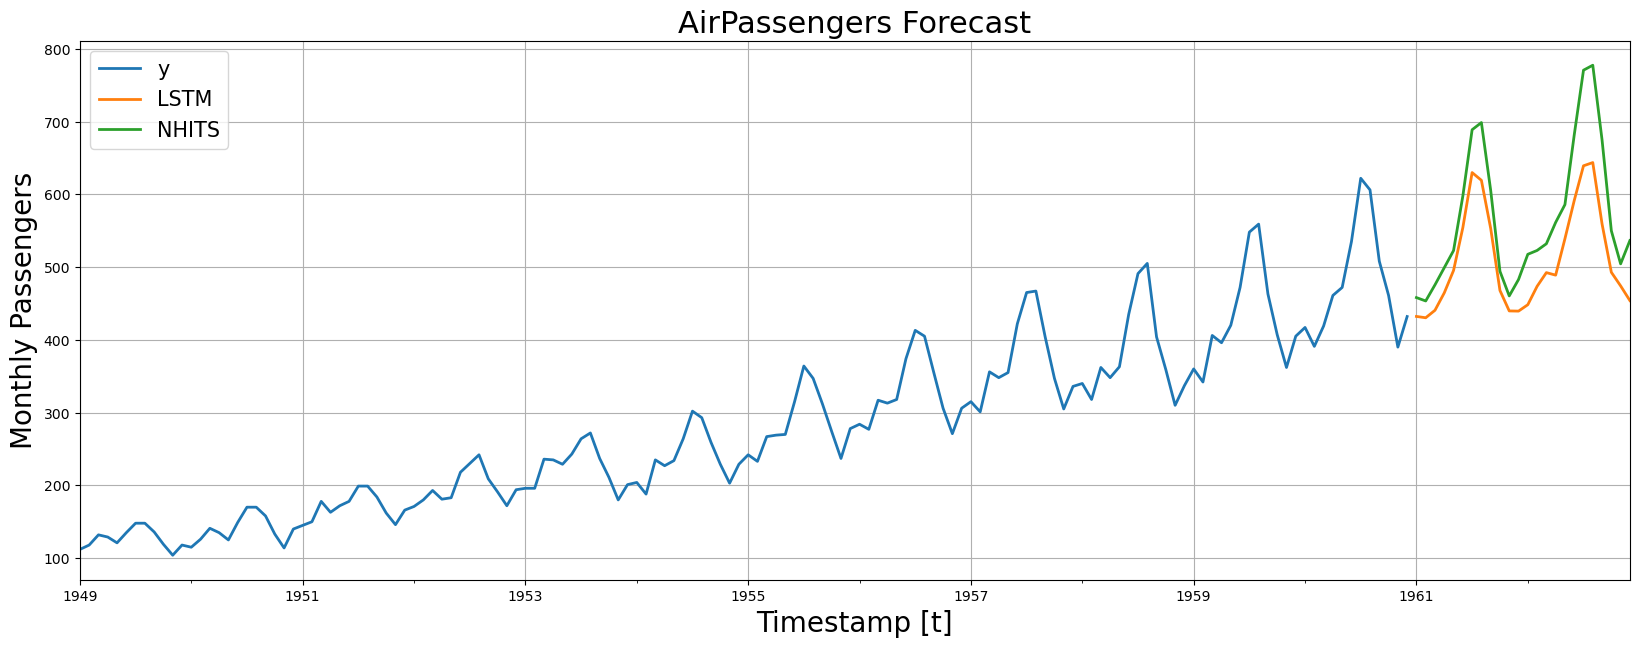

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()